# Custom Layers in Keras

# Task 1: Importing Libraries

In [2]:
import tensorflow as tf
import utils
import matplotlib.pyplot as plt
%matplotlib inline

print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.7.0


# Task 2: Import and Visualize Dataset

11501568/11490434 [==============================] - 0s 0us/step


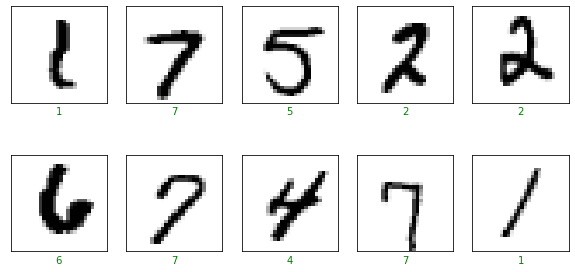

In [3]:
(x_train, y_train), (x_test, y_test) = utils.load_data()

utils.plot_random_examples(x_train, y_train).show()

# Task 3: Creating a Custom Layer

In [4]:
class ParametricRelu(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ParametricRelu, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.alpha = self.add_weight(
            name='minimum', 
            shape=(1,),
            initializer='zeros',
            trainable=True
        )
        super(ParametricRelu, self).build(input_shape)
    
    def call(self, x):
        return tf.maximum(0., x) + self.alpha * tf.minimum(0., x)

# Task 4: Creating the Model

In [5]:
def create_model(use_prelu=True):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, input_shape=(784,)))
    if not use_prelu:
        model.add(tf.keras.layers.ReLU())
    else:
        model.add(ParametricRelu())
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 parametric_relu (Parametric  (None, 64)               1         
 Relu)                                                           
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,891
Trainable params: 50,891
Non-trainable params: 0
_________________________________________________________________


# Task 5: Model Training

In [6]:
print('Initial alpha:', model.layers[1].get_weights())

h = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5
)

print('Final alpha:', model.layers[1].get_weights())

Initial alpha: [array([0.], dtype=float32)]
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2959 - accuracy: 0.9166 - val_loss: 0.1621 - val_accuracy: 0.9499
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1313 - accuracy: 0.9604 - val_loss: 0.1310 - val_accuracy: 0.9613
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0920 - accuracy: 0.9718 - val_loss: 0.1008 - val_accuracy: 0.9695
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0704 - accuracy: 0.9789 - val_loss: 0.1045 - val_accuracy: 0.9691
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0568 - accuracy: 0.9819 - val_loss: 0.0929 - val_accuracy: 0.9710
Final alpha: [array([-1.0256456], dtype=float32)]


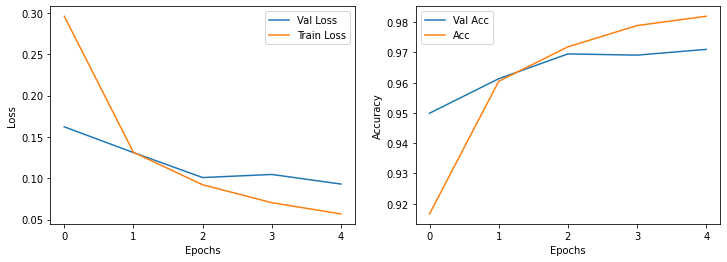

In [7]:
utils.plot_results(h).show()

# Task 6: Comparison with ReLU

In [8]:
model = create_model(use_prelu=False)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
h = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3035 - accuracy: 0.9148 - val_loss: 0.1765 - val_accuracy: 0.9505
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1455 - accuracy: 0.9574 - val_loss: 0.1270 - val_accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1061 - accuracy: 0.9682 - val_loss: 0.1121 - val_accuracy: 0.9665
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0840 - accuracy: 0.9743 - val_loss: 0.1061 - val_accuracy: 0.9683
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0687 - accuracy: 0.9790 - val_loss: 0.0957 - val_accuracy: 0.9710


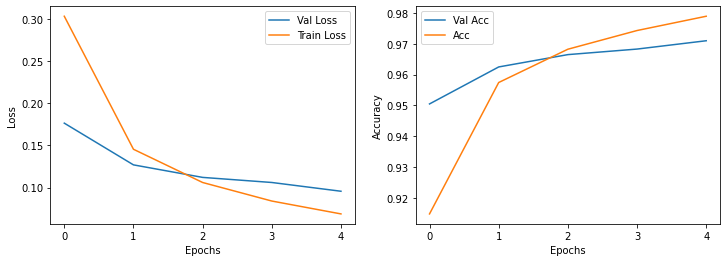

In [10]:
utils.plot_results(h).show()